# ML Task-01

Implement a linear regression model to predict the prices of houses based on their square footage and the number of bedrooms and bathrooms.

Dataset : - https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data

In [302]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [303]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [304]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [305]:
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


<Axes: >

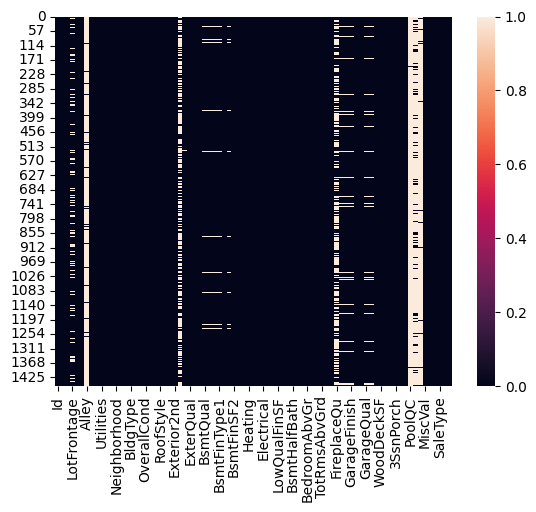

In [306]:
sns.heatmap(df_train.isnull())

In [307]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [308]:
null_columns=[]
for i in df_train.columns.tolist():
    if df_train[i].isnull().sum() >= 500:
        null_columns.append(i)
        print(i,df_train[i].isnull().sum())

Alley 1369
MasVnrType 872
FireplaceQu 690
PoolQC 1453
Fence 1179
MiscFeature 1406


In [309]:
df_train = df_train.drop(columns=null_columns)
df_test = df_test.drop(columns=null_columns)

In [310]:
df_train_cleaned = df_train.ffill()
df_test_cleaned = df_test.ffill()

In [311]:
df_train_cleaned.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000


<Axes: >

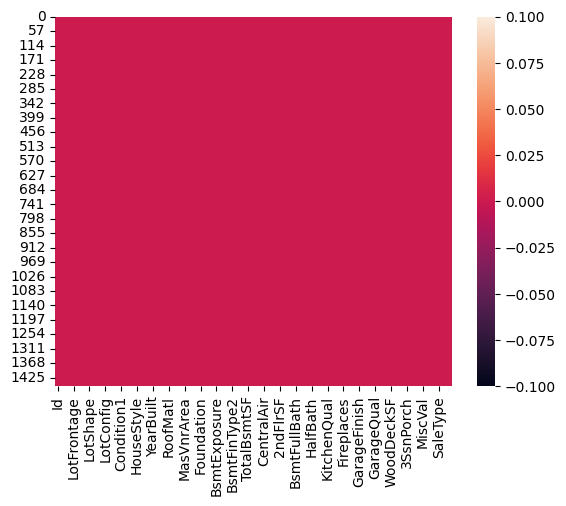

In [312]:
sns.heatmap(df_train_cleaned.isnull())

In [313]:
df_train_cleaned.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.104795,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.492466,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,23.846996,9981.264932,1.382997,1.112799,30.202904,20.645407,180.795612,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,70.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,165.250000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


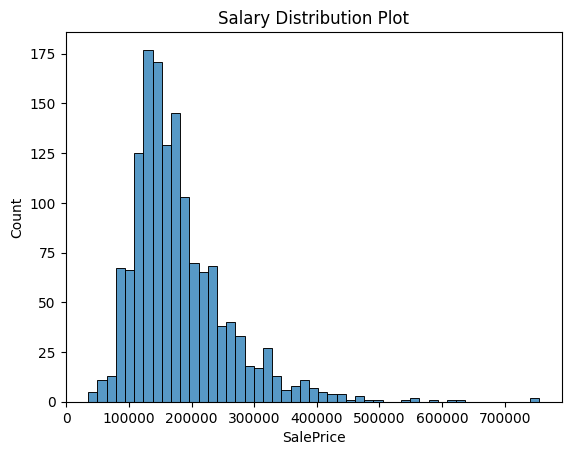

In [314]:
plt.title('Salary Distribution Plot')
sns.histplot(df_train_cleaned['SalePrice'])
plt.show()

# Split data 

In [315]:
from sklearn.model_selection import train_test_split

In [316]:
features = ['GrLivArea', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr']

target = 'SalePrice'

In [317]:
X = df_train_cleaned[features]
y = df_train_cleaned[target]

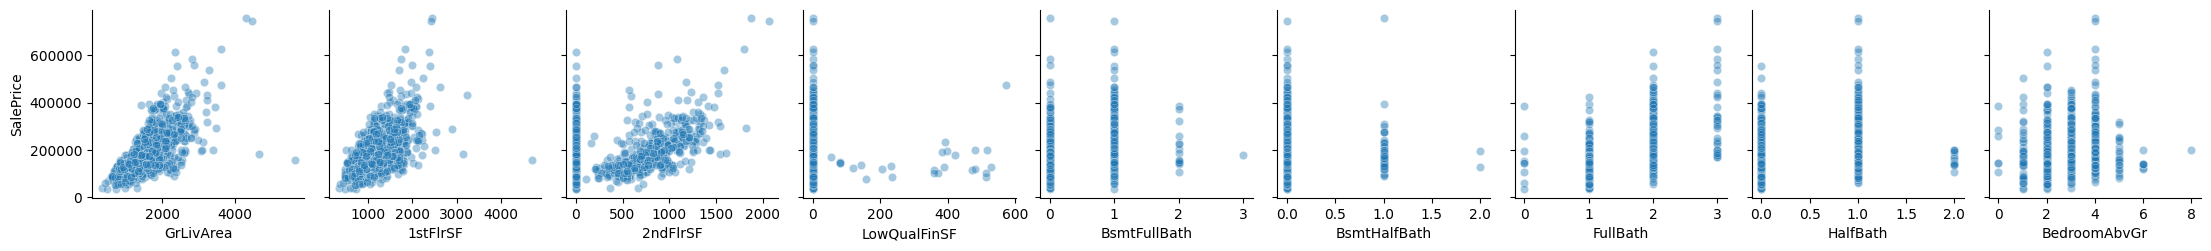

In [318]:
df = pd.concat([X, y], axis=1)

# Plotting grid of scatter plots for each feature against the target variable
sns.pairplot(df, x_vars=features, y_vars=[target], kind='scatter', 
             plot_kws={'alpha':0.4}, diag_kws={'alpha':0.55, 'bins':40})

plt.show()

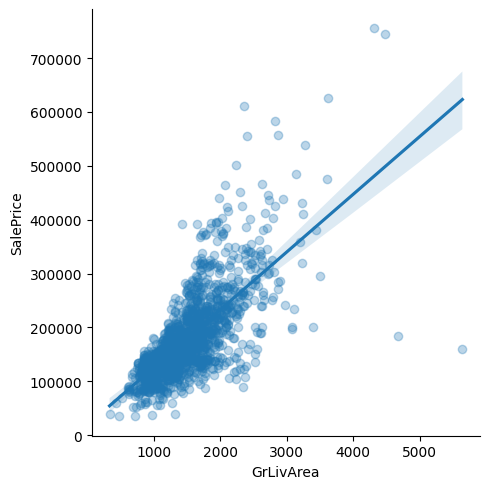

In [319]:
sns.lmplot(x='GrLivArea', 
           y='SalePrice', 
           data=df_train_cleaned,
           scatter_kws={'alpha':0.3})

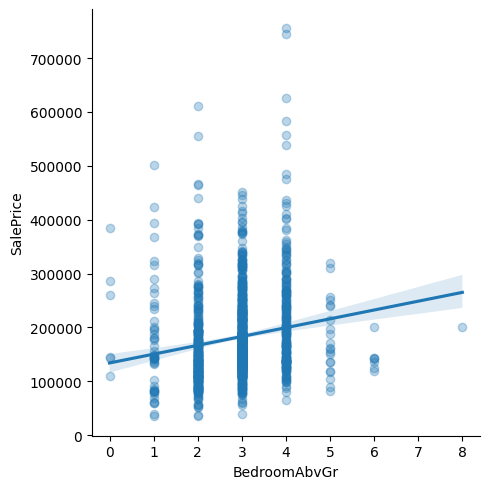

In [320]:
sns.lmplot(x='BedroomAbvGr', 
           y='SalePrice', 
           data=df_train_cleaned,
           scatter_kws={'alpha':0.3})

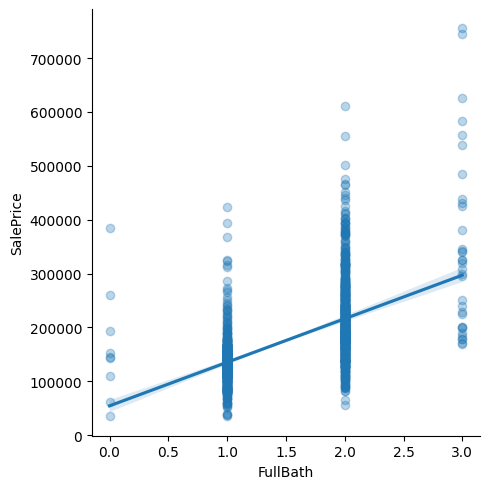

In [321]:
sns.lmplot(x='FullBath', 
           y='SalePrice', 
           data=df_train_cleaned,
           scatter_kws={'alpha':0.3})

In [322]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Train model (Linear Regression)

In [323]:
model = LinearRegression()

In [324]:
model.fit(X_train, y_train)

LinearRegression()

In [325]:
coefficients = model.coef_

In [326]:
model.score(X, y)

0.6541686106425739

In [327]:
for feature, coef in zip(features, coefficients):
    print(f'{feature}: {coef}')

GrLivArea: 45.45358200866404
1stFlrSF: 70.93123244880826
2ndFlrSF: 19.004245633922277
LowQualFinSF: -44.481896073804585
BsmtFullBath: 22125.53078348177
BsmtHalfBath: 6538.890647874652
FullBath: 34869.22887902238
HalfBath: 22717.7813535538
BedroomAbvGr: -18379.60698218067


# Predict results

In [328]:
predictions = model.predict(X_test)

In [329]:
predictions

array([112866.76155431, 308640.3343831 , 120052.08531031, 176290.63790428,
       245946.65513164, 114236.0669219 , 196277.14028942, 177864.07007276,
       114236.0669219 , 139816.75682811, 164181.1874575 , 105874.74768516,
       104456.52017301, 195548.80813709, 197776.41151491, 139849.91980465,
       194102.03176818, 132388.87564281, 118189.92827899, 211156.78931096,
       248865.46919518, 182918.45688664, 195203.29995175, 131470.21316371,
       205570.318217  , 174823.11746156, 172853.76931789, 100964.97573929,
       191090.64462772, 192629.99407356, 111333.7489331 , 245860.69417442,
       305226.89148007, 111206.83941155, 229429.20518078, 136367.56907302,
       208588.96205608, 189493.14184336, 257621.22795059, 103059.90239952,
        77348.7045997 , 261202.22429556,  92594.46280045, 277273.69042059,
       119142.61653332, 183760.69353856, 106551.44683325, 115301.91765622,
       299466.43556541, 148364.58622292,  97017.08574983, 239778.25996539,
       120786.70154331, 3

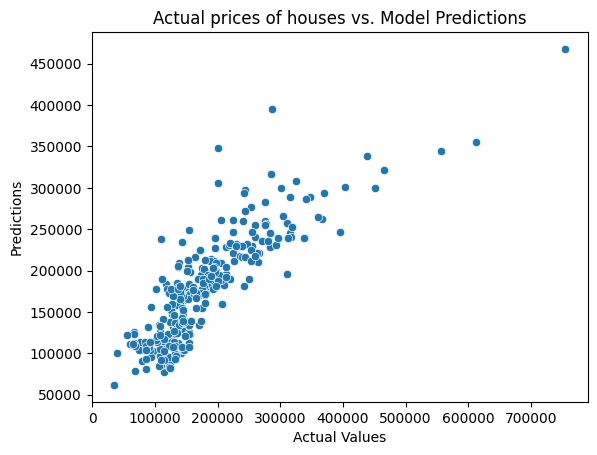

In [330]:
sns.scatterplot(x=y_test, y=predictions)
plt.xlabel('Actual Values')
plt.ylabel('Predictions')
plt.title('Actual prices of houses vs. Model Predictions')
plt.show()

# Evaluation of the model

In [331]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

In [332]:
print('Mean Absolute Error:',mean_absolute_error(y_test, predictions))
print('Mean Squared Error:',mean_squared_error(y_test, predictions))
print('Root Mean Squared Error:',math.sqrt(mean_squared_error(y_test, predictions)))

Mean Absolute Error: 31410.205502278408
Mean Squared Error: 2269069226.157571
Root Mean Squared Error: 47634.74809587609


<Axes: xlabel='SalePrice', ylabel='Count'>

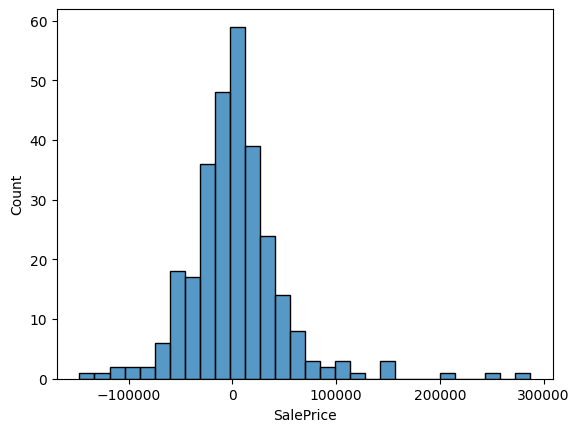

In [333]:
residuals = y_test-predictions
sns.histplot(residuals, bins=30)

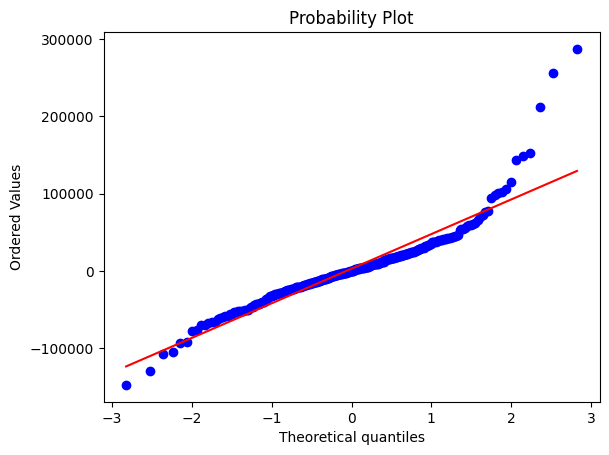

In [334]:
import pylab 
import scipy.stats as stats

stats.probplot(residuals, dist="norm", plot=pylab)
pylab.show()

# Use the trained model on our test data 

In [335]:
Xt = df_test_cleaned[features]

In [336]:
test_predictions = model.predict(Xt)

In [337]:
test_predictions

array([104689.28980193, 159422.08883339, 192805.94429241, ...,
       128229.8257631 , 101461.04973747, 220250.83345123])

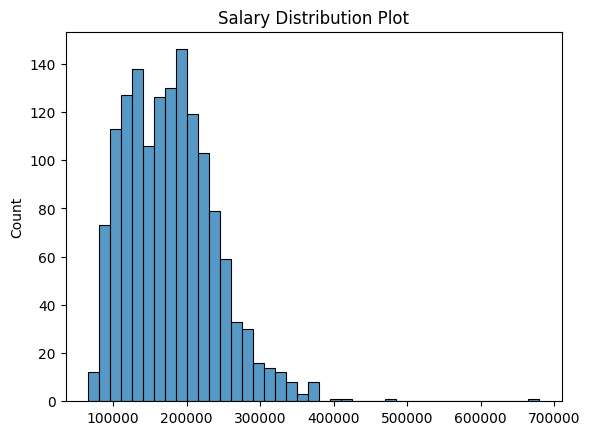

In [338]:
plt.title('Salary Distribution Plot')
sns.histplot(test_predictions)
plt.show()

In [339]:
submission_df = pd.DataFrame({
    'Id': df_test_cleaned['Id'],
    'SalePrice': test_predictions
})

# Save the predictions to a CSV file
submission_df.to_csv('submission.csv', index=False)

# Conclusion 

The current linear regression model provides a basic understanding of house price predictions, but the relatively high error metrics indicate room for improvement.